
<div align="center"><img src='https://bestfriends.org/sites/default/files/styles/max_650x650/public/partners/Austin%20Animal%20Center.jpg'/>

<h1 style="color:#900C3F;font:luminary;text-align:center;"><i>Austin Animal Center - December 16, 2022</i></h1>

#### *Can we predict if the animal going to be adopted?*

<h2 style="color:#900C3F;">Project's Goal</h2> 

Find the features that will help us to predict our target variable - ```outcome_type```. Build the model that performs with the accuracy better than the baseline - 70%

<h2 style="color:#900C3F;">Project's Description</h1> 

<div class=“alert alert-success”>

    Austin Animal Center is the municipal shelter for the City of Austin and unincorporated Travis County. Together with Austin Pets Alive! this shelter is doing an amazing job on keeping as many animals as possible away from  euthanasia. Even animals that entered the shelter with an Euthanasia Request get euthanized only in less than  25% of cases.
    Data  contains records from October 1, 2013 till December 12, 2022 included. During this time period almost 100K animals went through the shelter. Around 70% of them were adopted, 2.5% euthanized. This is the lowest euthanasia rate across United States. Creating the classification model potentially can help identify the animals at the high   risk of euthanasia and help to put more efforts for the happy ending for them.
</div>

In [1]:
# import modules to run the project
import src.wrangle as wr
import src.explore as ex
import src.modeling as md

#improve the quality of visualizations
%matplotlib inline
%config InlineBackend.figure_format='retina'

<h3 style="color:#900C3F;">Data exploration</h3> 

- As a first step of the exploration I divided the data into three data sets: train, validate and test to adoid data leakage.
- The target variable of the project is ```outcome_type```. I'll try to predict if the Animal gets adopted, tranferred to another facility (shelter, zoo, vet clinic etc), dies of natural causes or is euthanized. 
- I look for the variables that can help me to build prediction model.
- I run statistical tests to confirm my findings.

For statistical tests:

- $H_0:$ stands for 'Null hypothesis’ 
- $H_a:$ stands for 'Alternative hypotheses'

- All statistical tests run for the **95% Confidence level**.
- The **significance level** (alpha) is set to **0.05**
- If the p-value is smaller than 0.05 we reject the Null hypothesis.

### 1. What is the outcome rate?

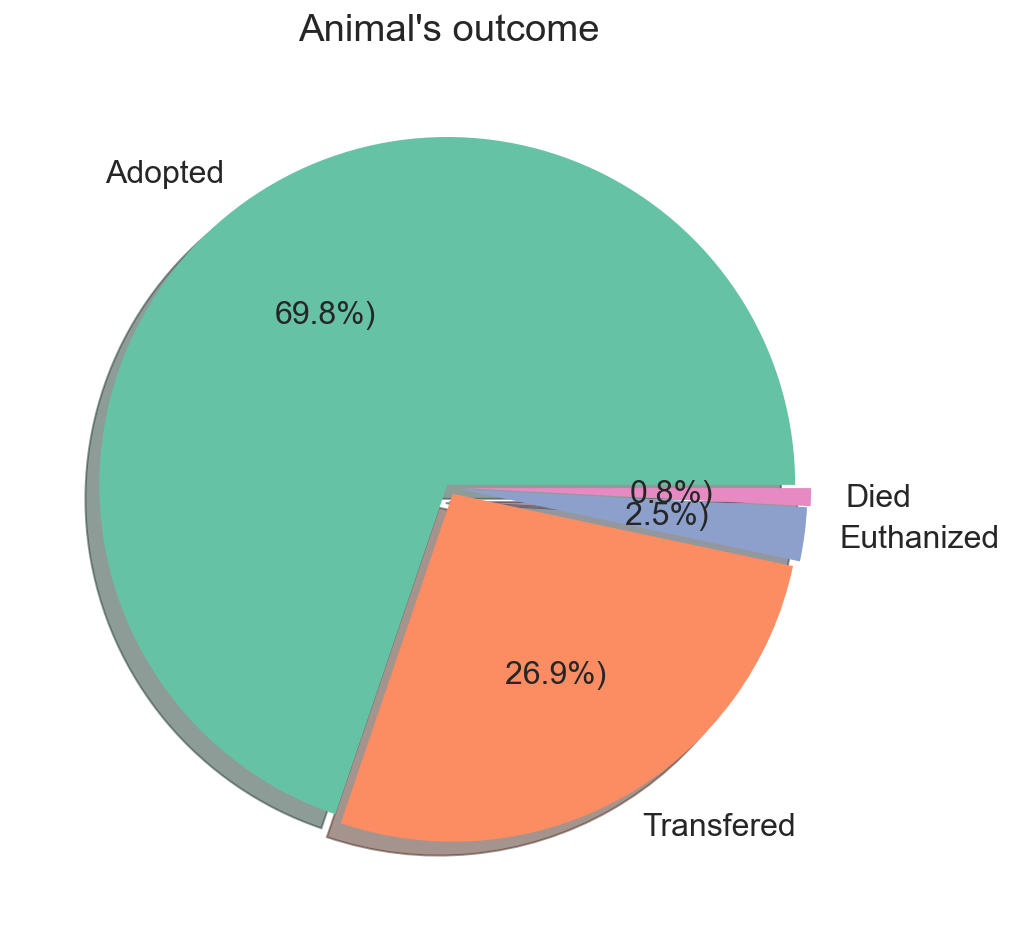

In [4]:
# visualize animal's outcome chances
ex.viz_animals_outcome()

We can say that Austin Animal Center is taking a good care about their animals. Most of animals in the shelter are either adopted or transfered. Only 2.5% are euthanized and less than 1% dies from natural reasons.

### 2. Is the animal type related to the outcome?

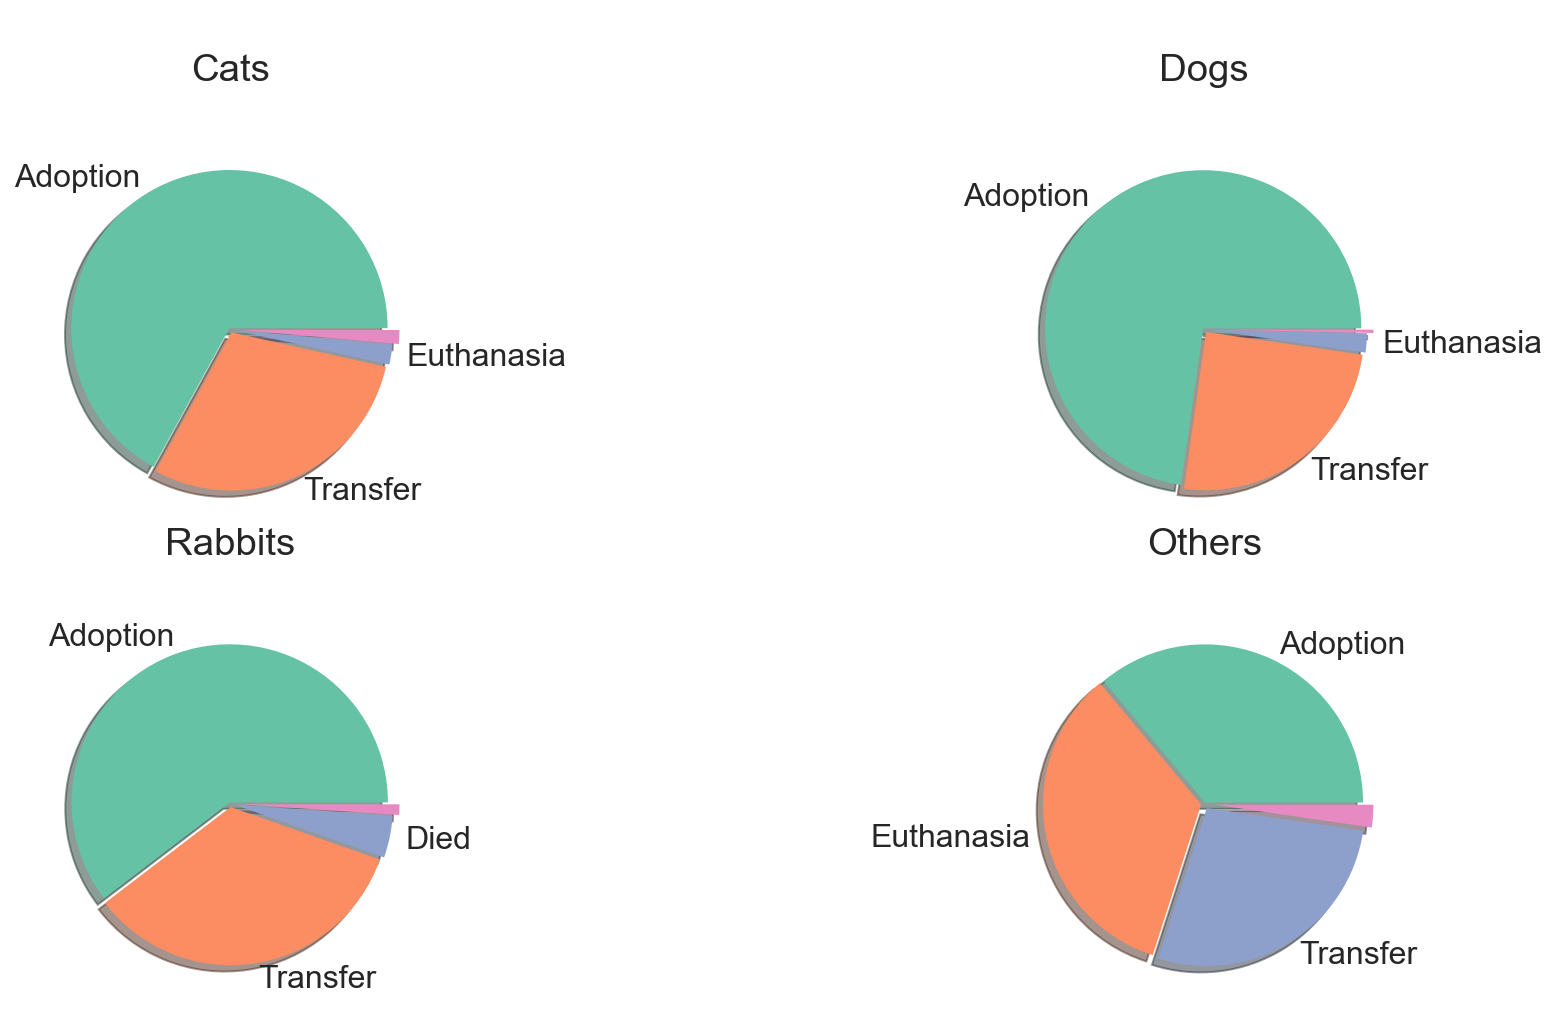

In [7]:
# visualize cats/dogs/rabbits pie charts
ex.viz_animal_type_vs_outcome()

The outcome has an association with the animal type. We can see that animals other than cats, dogs, or rabbits get euthanized much more often, and cats/dogs are euthanized more often than rabbits.

To confirm that the animal type is connected to the outcome type I'll run the Chi Squared statistical test.

$H_0:$ There is no association between ```animal_type``` and ```outcome_type```.

$H_a:$ There is no association between ```animal_type``` and ```outcome_type```.

In [12]:
# run the chi 2 statistical test to confirm or reject my null hypothesis 
ex.stats_animal_type()

Reject the Null Hypothesis
There is an association between animal_type and outcome_type


### 3. Does the sex of the animal have a relation to the outcome?

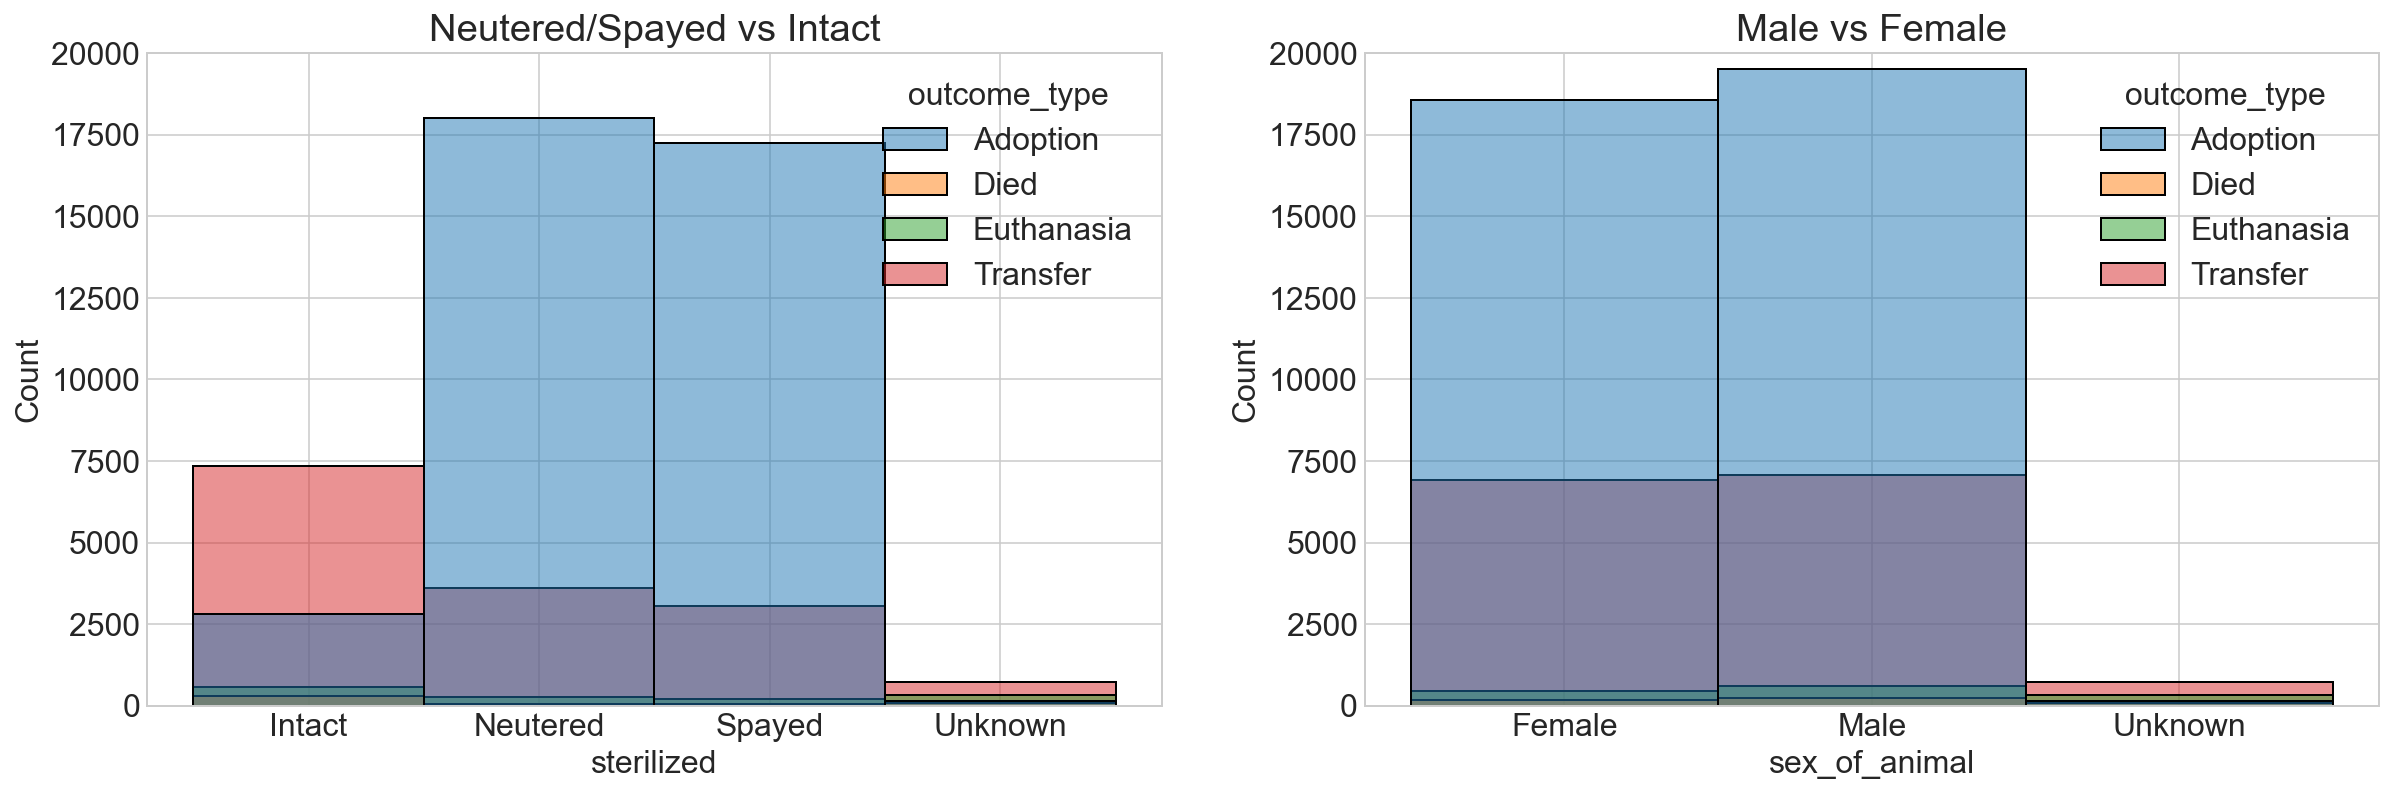

In [13]:
# call the visualization function to draw 2 sublpots
# the original data set has sex column as Intact Male/Female, Neutered Male, Spayed Female and Unknown type
# in visuals I break them as Male/Female and Intact/Neutral/Spayed
ex.sex_vs_outcome()

Looks like actual gender *Male / Female* have almost the same outcomes, only 'unknown' gender leads more to the transfer to anther facility. Let's confirm if there is a relationship between sex and the outcome time with Chi Squered statistical test.

$H_0:$ There is no association between ```sex_of_animal``` and ```outcome_type```.

$H_a:$ There is no association between ```sex_of_animal``` and ```outcome_type```.

In [15]:
# call the function to run stat test checking if there is an assosiation between animal's sex and outcome type
ex.stats_sex_vs_outcome()

Reject the Null Hypothesis
There is an association between sex_of_animal and outcome_type


### 4. Is the animal's ageconnected to the outcome?

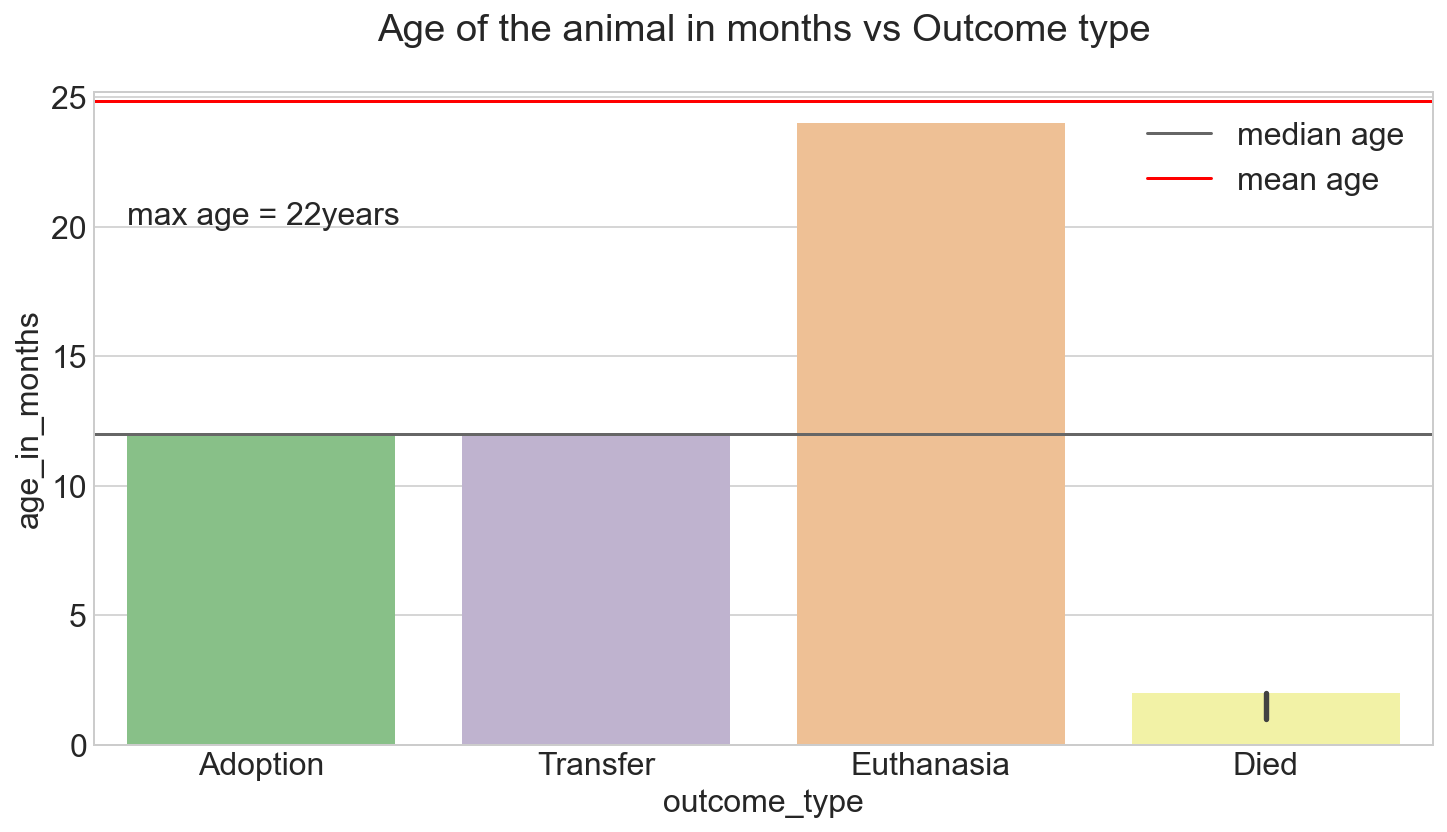

In [20]:
# call the function to visualize the average age of the animal for each outcome type
ex.age_vs_outcome()

The bar chart above shows the median age of the animal in months for every possible outcome type. Looks like it is much higher for euthanasia. Yyounger animals at at hight risk to die of natural causes. I plotted as well mean and median lines for the animals' age. The maximum age of animals in the data set is 22 years while its average is only 2 years. 

I'd like to check as well if there is a significant difference in means of the ```age_on_check_in``` among all outcome types and how is the average age in every group different from the population.

$H_0:$ There is a difference in means in ```age_on_check_in``` among different ```outcome_type``` and total population.

$H_a:$ There is *no* difference in means in ```age_on_check_in``` among different ```outcome_type``` and total population.

In [34]:
# run one sample t-test to compare mean of the group vs the population mean
ex.ttest_1s('age_on_check_in')

Adopted
Reject the Null Hypothesis
There is a difference in means between the Adopted mean and the population mean

Transfered
Reject the Null Hypothesis
There is a difference in means between the Transfered mean and the population mean

Euthanized
Reject the Null Hypothesis
There is a difference in means between the Euthanized mean and the population mean

Died
Fail to reject the Null Hypothesis
There is no difference in means between the Died  mean and the population mean and population mean



$H_0:$ There is a difference in means of ```age_on_check_in``` among different outcome types

$H_a:$ There is *no* difference in means of ```age_on_check_in``` among different outcome types

In [38]:
ex.stats_compare_age('age_on_check_in')

Variances are different. Use an non-parametric Kruskal-Wallis test.

Reject the Null Hypothesis
There is a significant difference in age_on_check_in  between different outcome types


### 5. How differ the average age of the animal from its type? And how does it affect the outcome type?

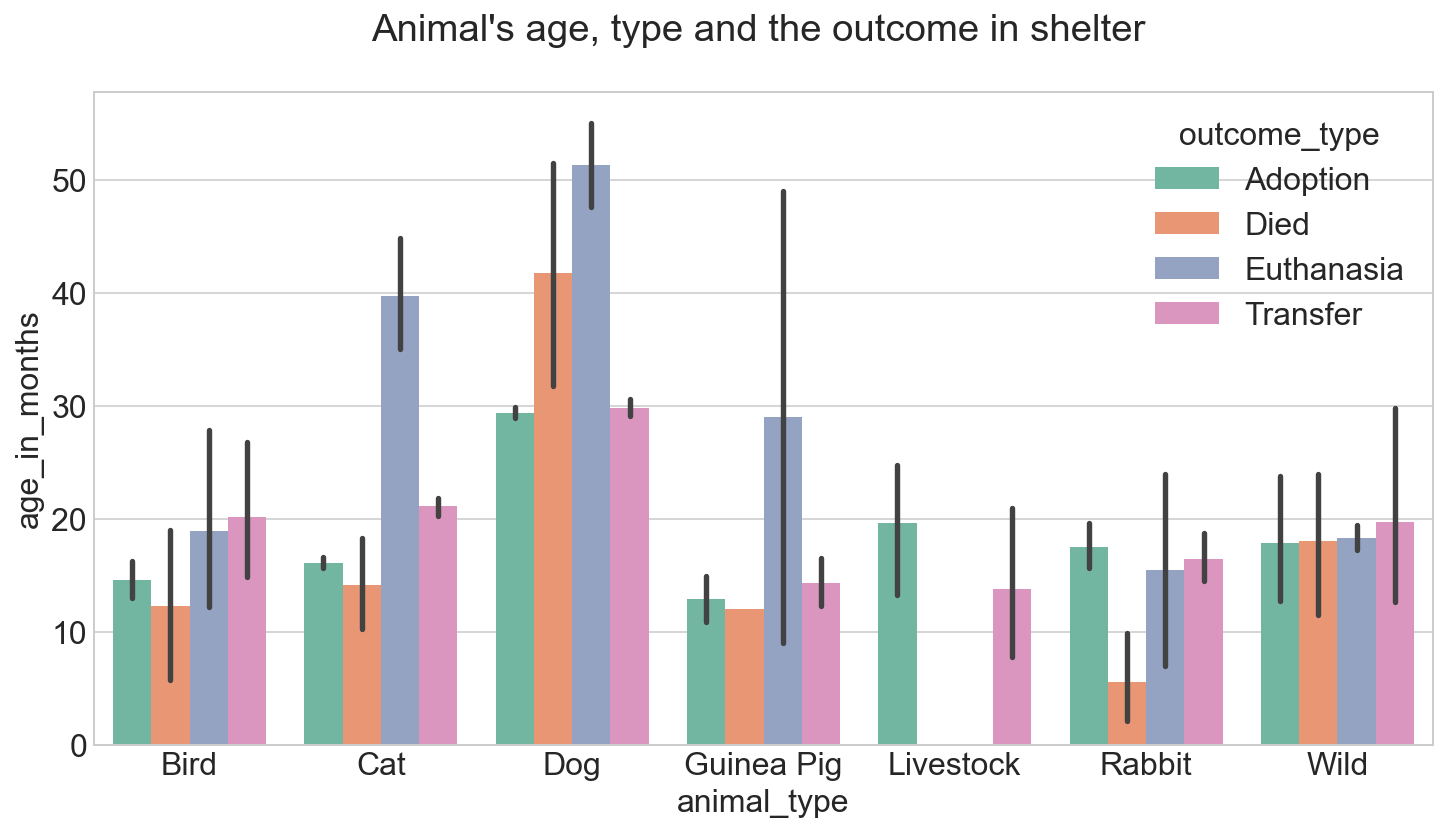

In [41]:
# call the visualization function
ex.viz_age_type_outcome()

We can see that beeing an old cat or an old guinea pig dramatically increase the chance of the euthanasia for an animal. While wild animals have almost equal chances to be adopted, transfered, euthanized or die not depending on their age.

<h3 style="color:#900C3F;">Exploration Takeaways</h3> 

 - Almost 70% of animals are adopted, around 26% are transfered to other facilities, 2.5% of animals are euthanized and less than 1% die of natural causes.
 - The outcome type has an association with the animal type. Animals other than cats, dogs, or rabbits get euthanized much more often, and cats/dogs are euthanized more often than rabbits.
 - Intact animals have much lower chances to be adopted.
 - Despite the distribution of outcomes for males and females look relatively the same, the statistical test shows that the sex plays a significant role in the outcome. It might happen because of 'Unknown' sex group.
 - Older animals have higher chances to be euthanized while very young animals die more from natural causes.
 - There is a significant difference in means between the age on the check-in and overall mean among different outcomes.
 - There is a significant difference in means of the ```age_on_check_in``` among all outcome groups.
 - Beeing an old cat or an old guinea pig dramatically increase the chance of the euthanasia for an animal. While wild animals have almost equal chances to be adopted, transfered, euthanized or die not depending on their age.

<h3 style="color:#900C3F;">Modeling</h3> 

To prepare the data set for modeling we:

- digitized the categorical data
- removed the features that are not useful for predictions (see the table below)
- separated the target variable from the train, validate and test data sets.

#### Features to drop before modeling

|Feature|The reason|
|:------|:-------|
|<img width=150/>|<img width=450/>|
|*animal_id*| id number|
|*name*|not suitable for modeling|
|*first_check_in*| value passed to ```days_at_shelter```|
|*last_check_out*| value passed to ```days_at_shelter```|
|*age_in_years*|not significant for the prediction of natural death|
|*age_in_month*|lower significance that ```age_in_days```|
|*date_of_birth*|date type, used to create age features|
|*first_check_in*|date type, used to create age features|
|*last_check_out*|date type, used to create age features|
|*sex*|used to create ```sex_of_animal``` and ```sterilized``` features|
|*color*|too many categorical values|
|*outcome_subtype*|is ```outcome_type``` description|

All other features will go into the train, validate and test data sets. The column ```breed``` contains too many categorical values. I created dummy variables only for some of them.

**How I create models**

I use 3 different classifiers (classification algorithms): 
- Decision Tree, 
- Random Forest, 
- Logistic Regression. 

For the first 2 of them, I use different hyperparameters. For Logistic regression I transform numerical values with Quantile Transformer. 

To run my models I use two different iterations. The first one takes only the data obtained from ```Austin_Animal_Center_Intakes.csv``` file. I will check if it is possible predict the outcome based on exclusively intake data. For the second iteretion I use all features from the intake data and the data of outcomes ```Austin_Animal_Center_Outcomes.csv```. The source of files is mentioned in the Readme file of the project.

### Data evaluation

To evaluate the model performance I use the accuracy score. My baseline the most popular outcome's percentage. It is 70%. 

In [43]:
# show the baseline value
md.baseline

0.7

Every classifier runs in a function where it creates models in a ```for``` loop. This loop iterates through the features and in some cases through the hyperparameters as well. After the iterations, the function returns a ```DataFrame``` that contains only 2 models from each classifier. Those are the models that obtained the best accuracy on the train set. 

The next function calculates the difference between the train and validate scores and returns the 3 best models (sorted by maximum ```validate_score``` and minimum score difference ```diff```)


First let's see three models that performed best on the training set with **intake** data.

In [51]:
# show the best performing models for the Intake data iteretion
md.best_results_intake()

,model_name,features,parameters,train_score,validate_score,diff
5,Random Forest,intake_only,9,0.808,0.807,0.001
11,Random Forest,intake_no_breed,9,0.809,0.806,0.003
2,Logistic Regression,intake_no_extra,0,0.804,0.805,-0.001


All *winning* models beat the baseline by 10%

The Random Forest model that doesn't contain any information has worse results on the validation set.

The results of models with the data from both **intake** and **outcome** data sets.

In [49]:
# show the best performing models for the iteration of intake and outcome features 
md.best_results_whole()

,model_name,features,parameters,train_score,validate_score,diff
17,Random Forest,whole_set_no_breed,9,0.814,0.812,0.002
5,Random Forest,whole_set,9,0.814,0.812,0.002
3,Decision Tree,whole_set,6,0.811,0.811,0.000


Adding additional features slightly improved the model's performance. Despite the features with the complete data imporove the performance, for the my final test I pick the **Random Forest Classifier** with intake only features, as it is more usefull for the real world. We are more interested in knowing right away the possible outcome for every animal and work on prevention the death or euthanasia.

In [52]:
# show the model's performance on the test data set.
md.run_best_model()

,result
Model name,Random Forest
Train score,0.808
Validate score,0.807
Test score,0.803


The performace dropped slightly although the model still beats the baseline by more than 10%

#### Modeling summary

- It is possible to make the prediction model that performs well using the features only from the ```Austin_Animal_Center_Intakes.csv``` data set.
- The best performing model has the accuracy 80.3%

<h3 style="color:#900C3F;">Conclusions and next steps</h3> 

The goals of this project were:
- Find the features that will help us to predict our target variable - outcome type. 
- Build the model that performs with the accuracy better than the baseline - 70%

My model performs 10% better than the baseline model. I created the additional features and they helped to improve the model performance. On the `intake only` data the model with engineered features performs 0.05% better than the model without them.

As the next step for this project I would try to build the regression model that predicts how many day the animal will stay in the shelter. In could help with the financial planning.